In [1]:
using Revise

using RealNeuralNetworks
using RealNeuralNetworks.Neurons
using RealNeuralNetworks.SWCs
using RealNeuralNetworks.Neurons.Segments
using Plots
Plots.plotly()
using PyPlot

import Pkg
include(joinpath(Pkg.dir("RealNeuralNetworks"), "src/Utils/PlotRecipes.jl"))
using .PlotRecipes

WebIO._IJuliaInit()

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /Users/jwu/.julia/packages/Plots/4oFWe/src/backends.jl:432
┌ Warning: `Pkg.dir(pkgname, paths...)` is deprecated; instead, do `import RealNeuralNetworks; joinpath(dirname(pathof(RealNeuralNetworks)), "..", paths...)`.
└ @ Pkg /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/Pkg.jl:607


In [2]:
# cellId = 76390
#  cellId = 76749
# cellId = 76627
#cellId = 76560
# cellId = 77151
cellId = 76564
# cellId = 77710

swc = SWCs.load_swc_bin("../01_data/swc.bin/$(cellId).swc.bin")
neuron = Neuron(swc)
neuron = Neurons.remove_hair(neuron)
neuron = Neurons.remove_subtree_in_soma(neuron)
neuron = Neurons.remove_terminal_blobs(neuron)
neuron = Neurons.remove_redundent_nodes(neuron)

segmentList = Neurons.get_segment_list( neuron )

49-element Vector{Segment{Float32}}:
 Segment{Float32}(NTuple{4, Float32}[(283440.0, 118880.0, 743175.0, 1196.3647)], 0x03, Union{Missing, Vector{RealNeuralNetworks.Neurons.Segments.Synapses.Synapse{Float32}}}[missing], Union{Missing, Vector{RealNeuralNetworks.Neurons.Segments.Synapses.Synapse{Float32}}}[missing])
 Segment{Float32}(NTuple{4, Float32}[(283125.53, 119480.0, 742866.25, 1130.448), (282739.47, 119259.47, 742116.9, 1068.4132), (282720.0, 119200.0, 742050.0, 1083.2424)], 0x03, Union{Missing, Vector{RealNeuralNetworks.Neurons.Segments.Synapses.Synapse{Float32}}}[missing, missing, missing], Union{Missing, Vector{RealNeuralNetworks.Neurons.Segments.Synapses.Synapse{Float32}}}[missing, missing, missing])
 Segment{Float32}(NTuple{4, Float32}[(282487.88, 118680.0, 741428.9, 960.3927), (282360.0, 118880.0, 740553.5, 618.41986), (282680.0, 118880.0, 739750.75, 688.0963), (283178.16, 119101.86, 739104.56, 633.162), (283989.22, 118850.78, 739260.0, 818.1161), (284240.0, 118042.23, 7390

In [3]:
Neurons.get_total_path_length(neuron)

395868.3f0

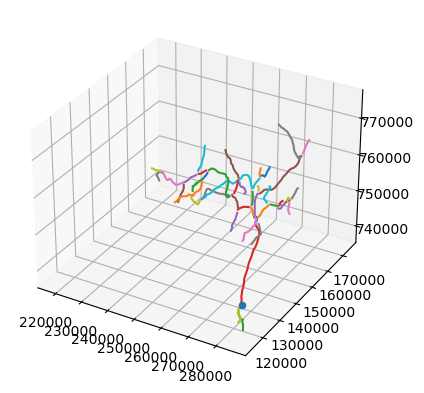

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/jwu/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [4]:
# neuron = Neurons.downsample_nodes(neuron; nodeNumStep=24)
PlotRecipes.plot_v2(neuron; nodeStep=1)
PyPlot.savefig("/Users/jwu/Pictures/neuron_plot.svg")

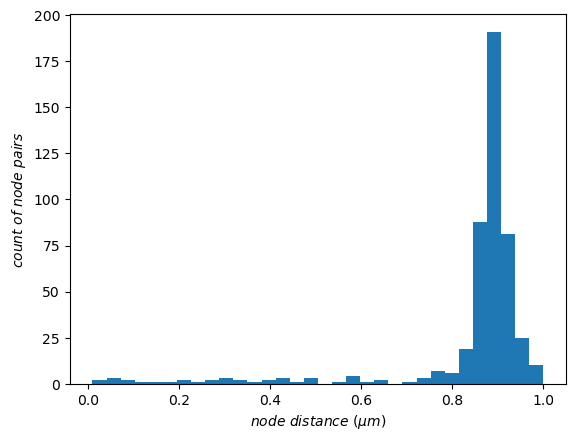

In [5]:
nodeDistanceList = Neurons.get_node_distance_list(neuron)
hist(nodeDistanceList./1000, bins=32)
xlabel(L"node\ distance\ (\mu m)")
ylabel(L"count\ of\ node\ pairs")

PyPlot.savefig(expanduser("/Users/jwu/Pictures/node_distance.svg"))

In [6]:
Neurons.get_total_path_length(neuron)

395868.3f0

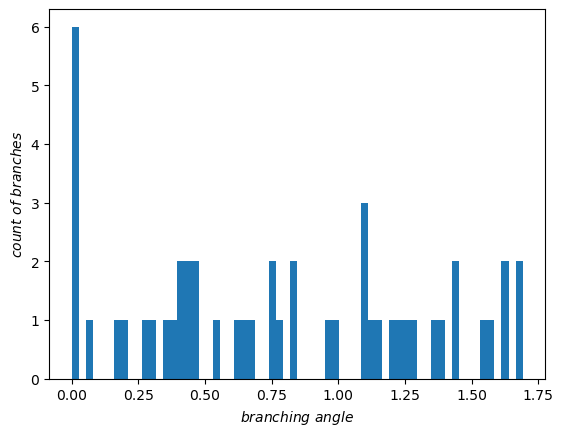

PyObject Text(25.000000000000007, 0.5, '$count\\ of\\ branches$')

In [7]:
branchingAngleList = map( i -> Neurons.get_branching_angle(neuron, i), 1:length(segmentList) )
p = hist(branchingAngleList, bins=64)
xlabel(L"branching\ angle")
ylabel(L"count\ of\ branches")

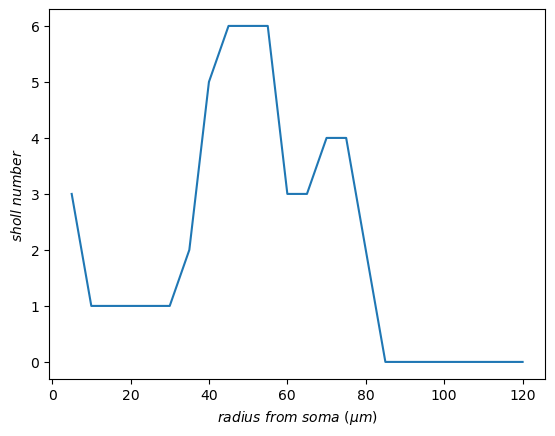

  0.030667 seconds (75.11 k allocations: 4.512 MiB, 96.14% compilation time)


In [8]:
radiusList = Vector{Float64}(5000:5000:120000)
@time shollNumList = Neurons.get_sholl_number_list(neuron, radiusList)
p = PyPlot.plot(radiusList./1000, shollNumList)
xlabel(L"radius\ from\ soma\ (\mu m)")
ylabel(L"sholl\ number")
PyPlot.savefig("/Users/jwu/Pictures/sholl_analysis.svg")

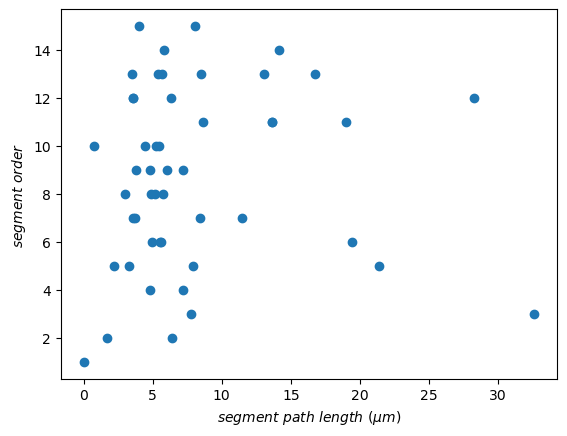

  0.026502 seconds (91.74 k allocations: 5.092 MiB, 99.55% compilation time)


In [9]:
segmentPathLengthList = Neurons.get_segment_path_length_list( neuron )
@time segmentOrderList = Neurons.get_segment_order_list( neuron )
PyPlot.scatter( segmentPathLengthList./1000, segmentOrderList)
xlabel(L"segment\ path\ length\ (\mu m)")
ylabel(L"segment\ order")

PyPlot.savefig("/Users/jwu/Pictures/segment_path_length_vs_segment_order.svg")

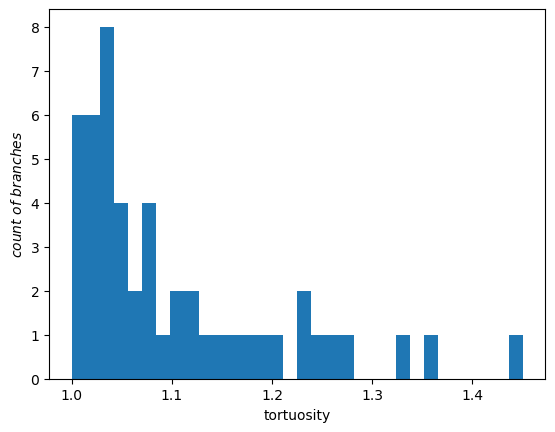

  0.102560 seconds (228.09 k allocations: 13.142 MiB, 99.35% compilation time)


In [10]:
@time tortuosityList = map(Neurons.Segments.get_tortuosity, segmentList)
p = hist(tortuosityList, bins=32)
xlabel("tortuosity")
ylabel(L"count\ of\ branches")
PyPlot.savefig("/Users/jwu/Pictures/tortuosity.svg")

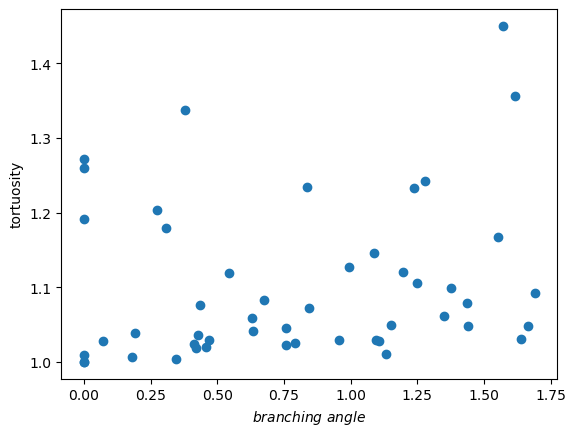

In [11]:
PyPlot.scatter(branchingAngleList, tortuosityList)
xlabel(L"branching\ angle")
ylabel("tortuosity")

PyPlot.savefig("/Users/jwu/Pictures/branching_angle_vs_tortuosity.svg")

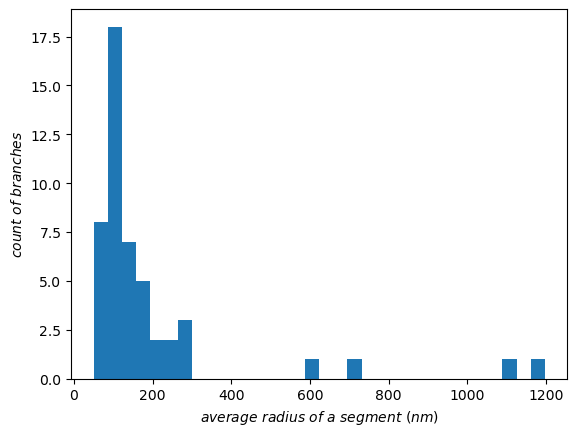

PyObject Text(25.000000000000007, 0.5, '$count\\ of\\ branches$')

In [12]:
using Statistics
averageRadiusList = map(b -> mean(Neurons.Segments.get_radius_list(b)), segmentList)
hist(averageRadiusList, bins=32)
xlabel(L"average\ radius\ of\ a\ segment\ (nm)")
ylabel(L"count\ of\ branches")

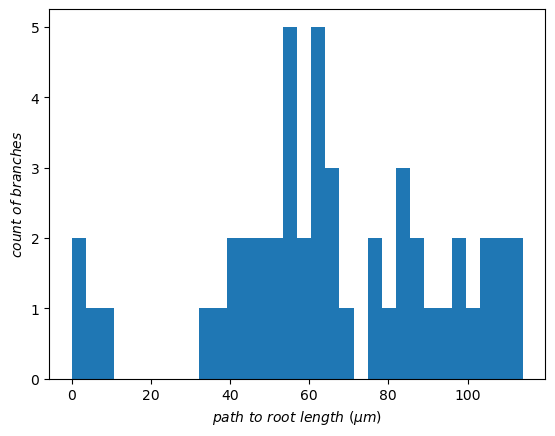

  0.109999 seconds (155.73 k allocations: 9.935 MiB, 98.34% compilation time)


In [13]:
@time path2RootLengthList = map(b -> Neurons.get_path_to_root_length(neuron, b;
                                                segmentPathLengthList=segmentPathLengthList), 1:length(segmentList))
p = hist( path2RootLengthList./1000, bins=32)
xlabel(L"path\ to\ root\ length\ (\mu m)")
ylabel(L"count\ of\ branches")

PyPlot.savefig("/Users/jwu/Pictures/path_to_root_length.svg")

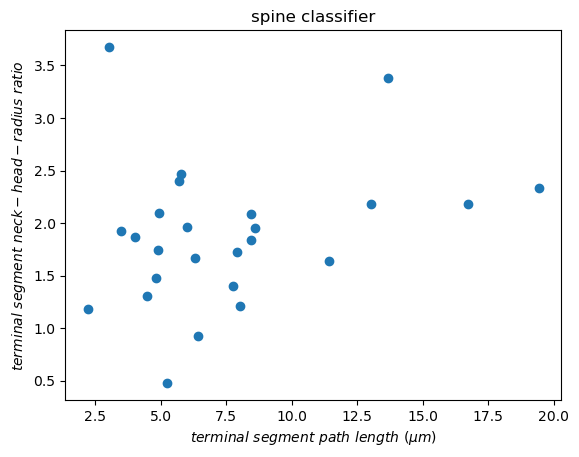

In [14]:
# identify spines
terminalSegmentIndexList = Neurons.get_terminal_segment_id_list(neuron)
terminalSegmentList = segmentList[ terminalSegmentIndexList ]
segmentPathLengthList = Neurons.get_segment_path_length_list( neuron )
terminalSegmentPathLengthList = segmentPathLengthList[ terminalSegmentIndexList ]
terminalSegmentNeckHeadRadiusRatioList = map(Neurons.Segments.get_neck_head_radius_ratio, terminalSegmentList)

PyPlot.scatter(terminalSegmentPathLengthList./1000, terminalSegmentNeckHeadRadiusRatioList)

xlabel(L"terminal\ segment\ path\ length\ (\mu m)")
ylabel(L"terminal\ segment\ neck-head-radius\ ratio")
title("spine classifier")

PyPlot.savefig("/Users/jwu/Pictures/spine_classifier.svg")

In [15]:
# @time fractalDimension, radiusList, massList = Neuronss.get_fractal_dimension( Neurons )
# p = plot(log(radiusList), log(massList), line=([:scatter], 2), leg=false,
#         xlabel="log of radius",
#         ylabel="log of mass")